In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import json
import random
import os

from sklearn.tree import DecisionTreeClassifier

from data_cleaning import DataCleaner, AutomaticCleaner, HypothesesFinder, DataExtractor

from sklearn.tree import plot_tree

In [3]:
extractor = DataExtractor()
cleaner= DataCleaner()
finder = HypothesesFinder()

In [19]:
df= pd.read_csv('sem_merged_database.csv')
with open ('values_of_columns.json', 'r') as f:
    values = json.load(f)

In [5]:
df = df.drop(['ignorance/belief wrt int','gradability wrt int', 'Q-to-P veridicality', 'Q-to-P distributivity', 'P-to-Q distributivity'], axis =1) 
dims = df.shape


In [6]:
test_db = pd.DataFrame()
for column in df.drop(['language', 'predicate', 'English translation', 'predicate class'], axis=1).columns:
    test_db[column] = np.random.choice(values[column], size=dims[0])
ones = np.random.binomial(dims[0], 0.66, 1)
lab =  [1]*ones[0] + [0]* (dims[0]-ones[0])
random.shuffle(lab)
test_db['label']= lab

In [7]:
test_db

veridicality conjoined with negation  \
0                     neither           contradictory   
1    typically anti-veridical                 neither   
2                   veridical                 neither   
3                     neither           contradictory   
4                   veridical               redundant   
..                        ...                     ...   
697                 veridical               redundant   
698  typically anti-veridical               redundant   
699                 veridical               redundant   
700                 veridical           contradictory   
701                 veridical           contradictory   

    conjoined with complement projection through negation  \
0                     neither                     neither   
1                   redundant                  projective   
2                     neither                   undecided   
3     typically contradictory                  projective   
4                     neither                     neither   
..                        ...                         ...   
697                 redundant        typically projective   
698             contradictory          typically reversal   
699   typically contradictory        typically projective   
700   typically contradictory          typically reversal   
701   typically contradictory                     neither   

               neg-raising    likelihood  unlikelihood equal likelihood  \
0                        0        always  incompatible       compatible   
1                        1        always        always     incompatible   
2    typically neg-raising    compatible        always           always   
3                        0    compatible  incompatible     incompatible   
4                        0        always    compatible       compatible   
..                     ...           ...           ...              ...   
697  typically neg-raising        always     typically           always   
698  typically neg-raising        always  incompatible       compatible   
699              undecided  incompatible    compatible     incompatible   
700  typically neg-raising        always        always        typically   
701                      0     typically     typically       compatible   

        certainty counter-certainty   uncertainty    preference    opposition  \
0      compatible        compatible     typically        always    compatible   
1          always            always        always  incompatible        always   
2    incompatible      incompatible    compatible    compatible     typically   
3      compatible            always  incompatible    compatible        always   
4          always            always  incompatible    compatible        always   
..            ...               ...           ...           ...           ...   
697    compatible            always    compatible  incompatible  incompatible   
698     typically         typically        always    compatible     typically   
699        always      incompatible  incompatible        always  incompatible   
700     typically            always     typically     typically    compatible   
701    compatible         typically    compatible     typically  incompatible   

     indifference focus sensitivity gradability wrt decl  label  
0      compatible                 0                    0      1  
1    incompatible                 1    complex-predicate      0  
2       typically                 1            undecided      0  
3    incompatible                 1                    1      0  
4    incompatible                 1                    1      1  
..            ...               ...                  ...    ...  
697        always                 0    complex-predicate      0  
698        always                 1            undecided      0  
699     typically                 0                    0      1  
700  incompatible                 1                    0      0  

In [154]:
X = extractor.get_X(test_db, cols=[], remove_typically=True)

In [112]:
# test_db = pd.DataFrame(np.random.randint(0,2,size=dims), columns=X.columns)

In [113]:
# ones = np.random.binomial(dims[0], 0.66, 1)
# lab =  [1]*ones[0] + [0]* (dims[0]-ones[0])
# random.shuffle(lab)
# test_db['label']= lab

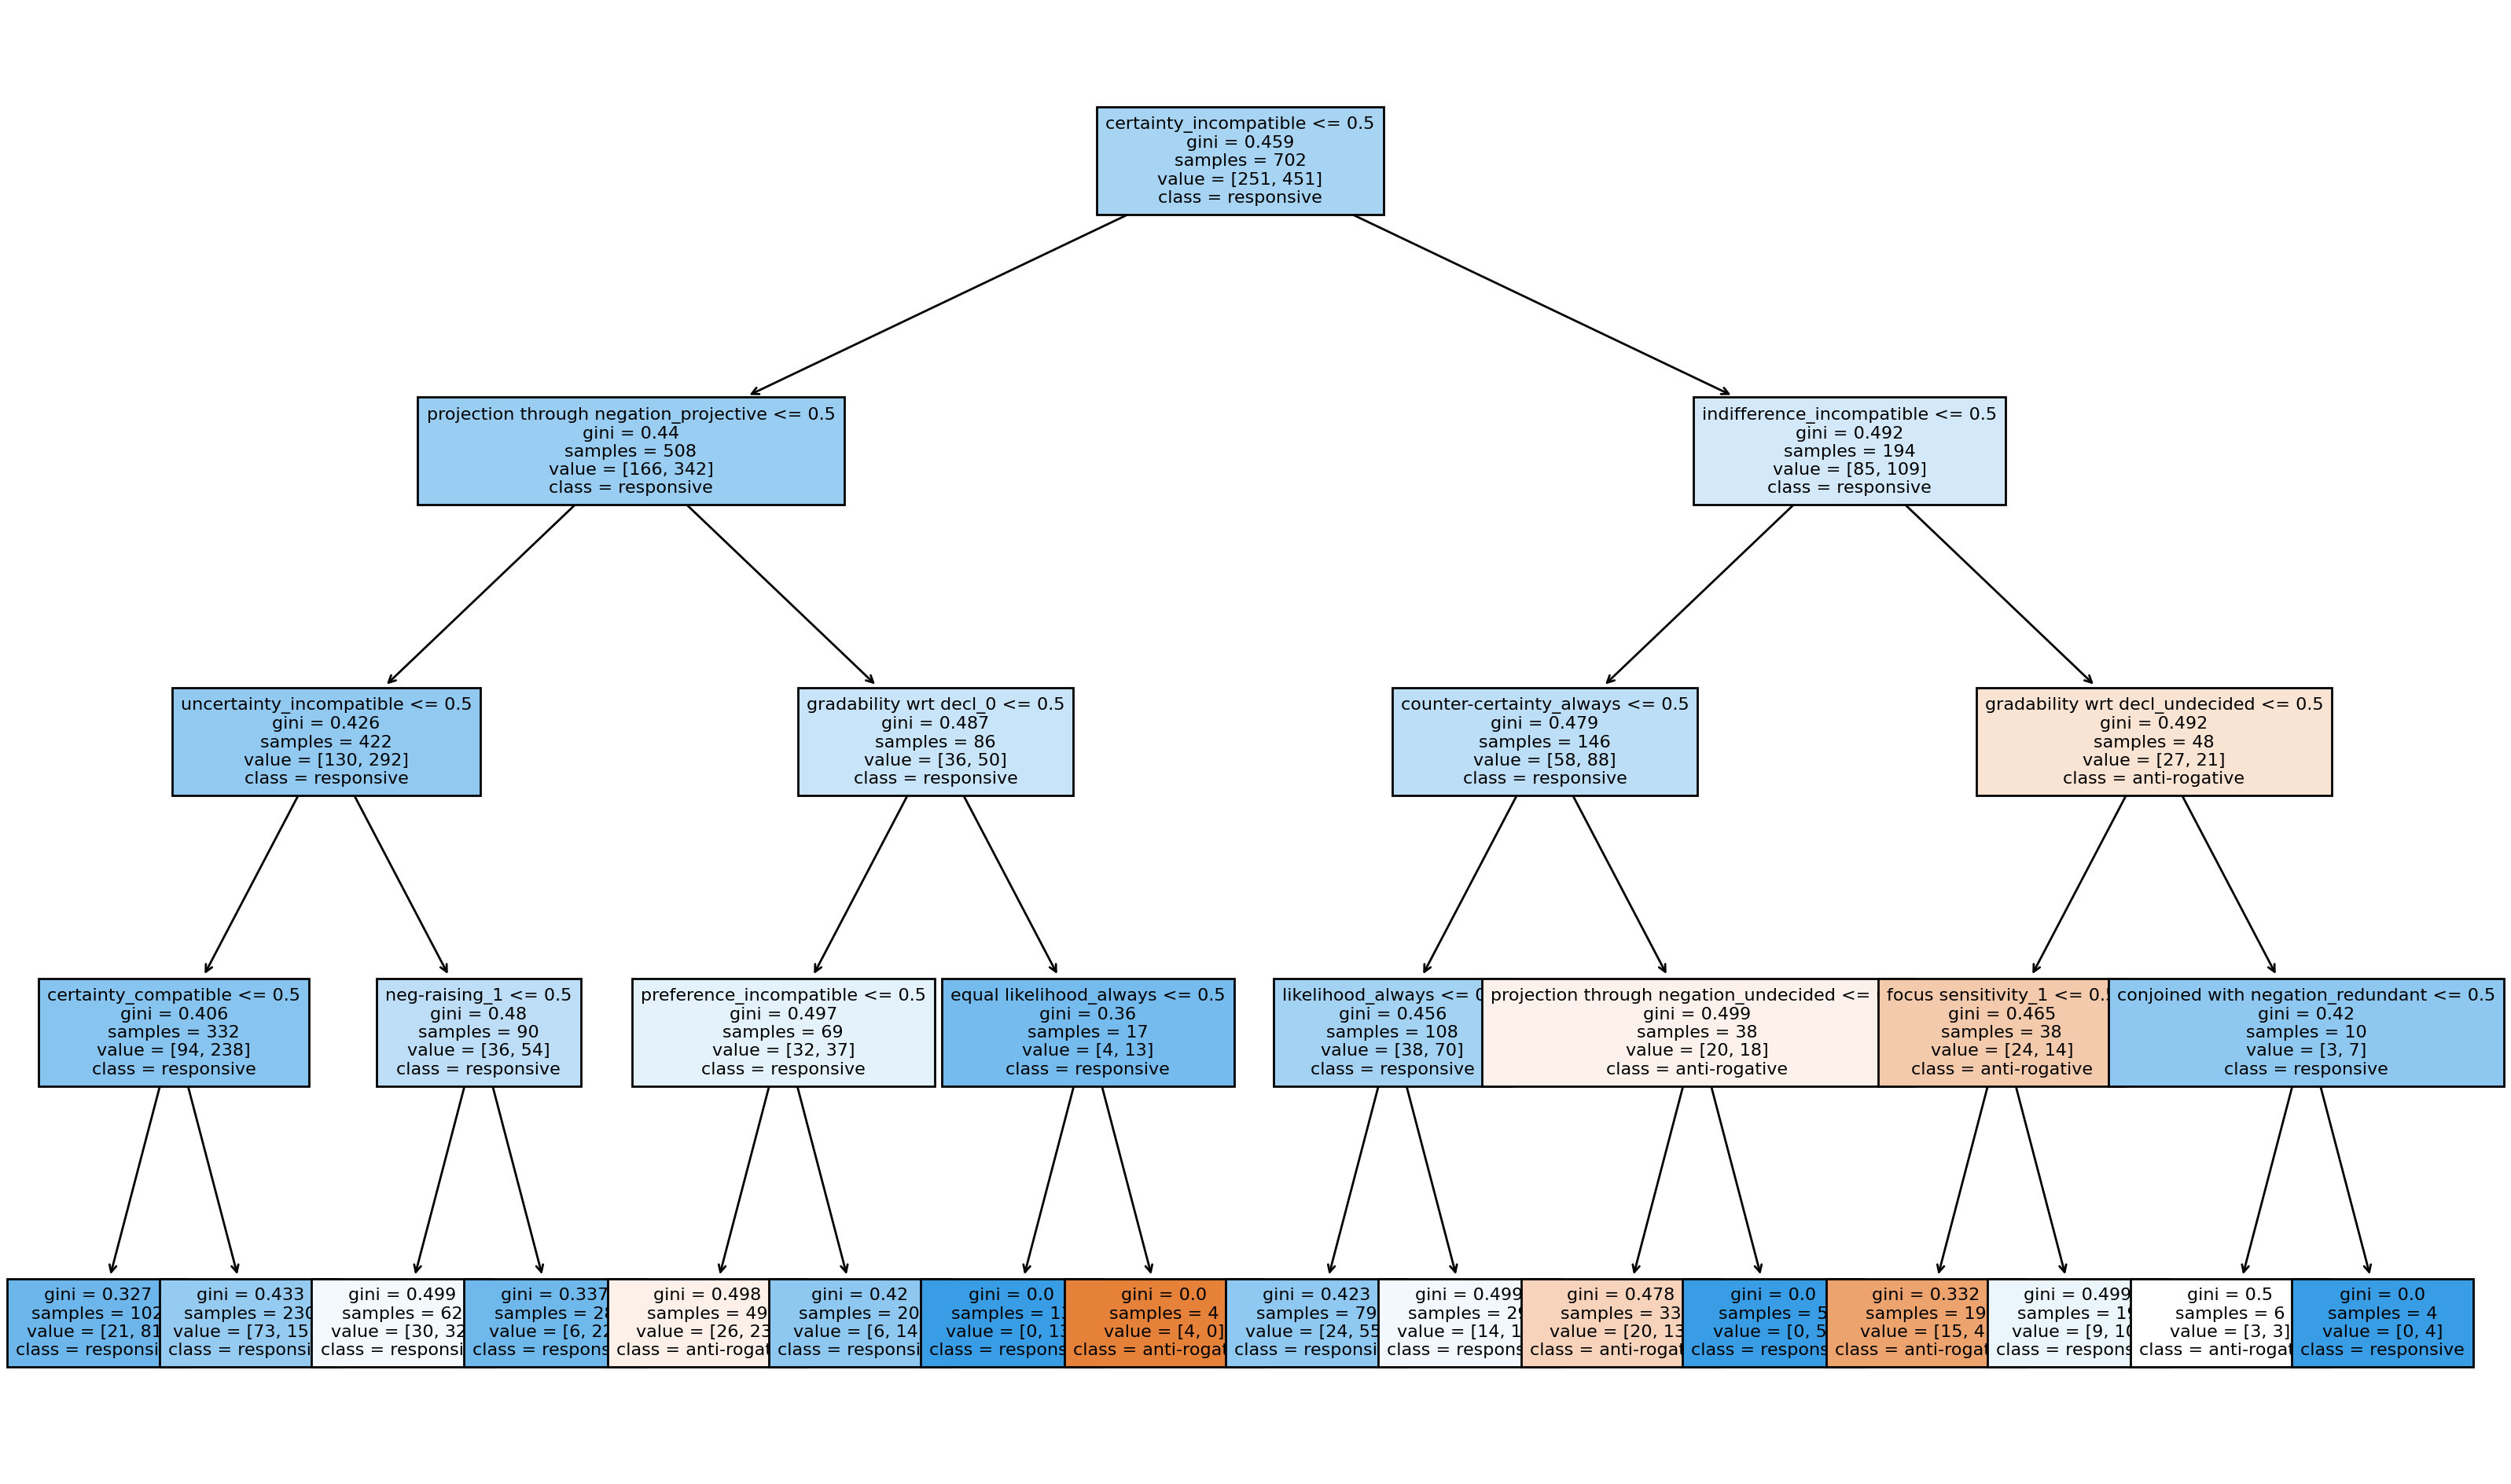

In [161]:
# model = DecisionTreeClassifier(max_depth= 4)
# model.fit(X,test_db['label'])
# plt.figure(figsize=(20,12), dpi=200)
# plot_tree(model, feature_names=X.columns, filled=True, fontsize=8, class_names=["anti-rogative", "responsive"]);

In [163]:
hypotheses = finder.forest_based_discovery(X,test_db['label'], limit=3)

In [166]:
hyps = finder.eliminate_order_significance(hypotheses)
len(hyps)

213


213

In [167]:
hss = [h for h in hyps if int(h[-1][-1]) > 10]

In [168]:
len(hss)

17

In [169]:
preds = []
lens = []
for i in range(10):
    test_db = pd.DataFrame()
    for column in df.drop(['language', 'predicate', 'English translation', 'predicate class'], axis=1).columns:
        test_db[column] = np.random.choice(values[column], size=dims[0])
    ones = np.random.binomial(dims[0], 0.66, 1)
    lab =  [1]*ones[0] + [0]* (dims[0]-ones[0])
    random.shuffle(lab)
    test_db['label']= lab
    X = extractor.get_X(test_db, cols=[], remove_typically=True)
    hypotheses = finder.forest_based_discovery(X,test_db['label'], limit=3)
    hyps = finder.eliminate_order_significance(hypotheses)
    length = len(hyps)
    lens.append(length)
    for h in hyps:
        preds.append(int(h[-1][-1]))
     

411
225
242
357
398
203
208
258
340
278


In [181]:
lens

[411, 225, 242, 357, 398, 203, 208, 258, 340, 278]

In [178]:
preds

[23,
 21,
 21,
 19,
 16,
 16,
 15,
 15,
 15,
 15,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [198]:
preds = []
lens = []
excp = []
ratios = []
for i in range(1):
    test_db = pd.DataFrame()
    for column in df.drop(['language', 'predicate', 'English translation', 'predicate class'], axis=1).columns:
        test_db[column] = np.random.choice(values[column], size=dims[0])
    ones = np.random.binomial(dims[0], 0.66, 1)
    lab =  [1]*ones[0] + [0]* (dims[0]-ones[0])
    random.shuffle(lab)
    test_db['label']= lab
    test_db['label'].replace(1, 'responsive')
    test_db['label'].replace(1, 'anti-rogative')
    X = extractor.get_X(test_db, cols=[], remove_typically=True)
    hypotheses = finder.forest_based_discovery(X,test_db['label'], limit=3, exception_size=10)
    # hyps = finder.eliminate_order_significance(hypotheses)
    hyps=hypotheses
    length = len(hyps)
    lens.append(length)
    for h in hyps:
        print(h)
        n_exp = int(h[-1][-1].split(': ')[-1])
        n_pred = int(h[-1][1])
        excp.append(n_exp)
        preds.append(n_pred)
        ratios.append(n_exp/n_pred)

[('uncertainty_always', '1'), ('indifference_compatible', '1'), ('conjoined with negation_redundant', '0'), (1, 50, 'exceptions: 9')]
[('conjoined with complement_redundant', '1'), ('equal likelihood_compatible', '0'), ('certainty_incompatible', '0'), (1, 45, 'exceptions: 10')]
[('conjoined with complement_redundant', '1'), ('conjoined with negation_neither', '1'), (1, 44, 'exceptions: 10')]
[('conjoined with complement_redundant', '1'), ('conjoined with negation_contradictory', '0'), ('conjoined with negation_redundant', '0'), (1, 44, 'exceptions: 10')]
[('conjoined with negation_neither', '1'), ('conjoined with complement_contradictory', '0'), ('conjoined with complement_neither', '0'), (1, 44, 'exceptions: 10')]
[('equal likelihood_incompatible', '1'), ('counter-certainty_compatible', '0'), ('projection through negation_neither', '1'), (1, 44, 'exceptions: 9')]
[('uncertainty_compatible', '0'), ('veridicality_anti-veridical', '1'), ('likelihood_always', '0'), (1, 43, 'exceptions: 10

In [202]:
sum(ratios)/len(ratios)


0.5089216604726571

In [203]:
sum(preds)/len(preds)

13.709292527554013

In [204]:
sum(excp)/len(excp)

6.408271259563855

In [205]:
preds = []
lens = []
excp = []
ratios = []
for i in range(10):
    test_db = pd.DataFrame()
    for column in df.drop(['language', 'predicate', 'English translation', 'predicate class'], axis=1).columns:
        test_db[column] = np.random.choice(values[column], size=dims[0])
    ones = np.random.binomial(dims[0], 0.66, 1)
    lab =  [1]*ones[0] + [0]* (dims[0]-ones[0])
    random.shuffle(lab)
    test_db['label']= lab
    test_db['label'].replace(1, 'responsive')
    test_db['label'].replace(1, 'anti-rogative')
    X = extractor.get_X(test_db, cols=[], remove_typically=True)
    hypotheses = finder.forest_based_discovery(X,test_db['label'], limit=3, exception_size=40)
    # hyps = finder.eliminate_order_significance(hypotheses)
    hyps=hypotheses
    length = len(hyps)
    lens.append(length)
    for h in hyps:
        n_exp = int(h[-1][-1].split(': ')[-1])
        n_pred = int(h[-1][1])
        excp.append(n_exp)
        preds.append(n_pred)
        ratios.append(n_exp/n_pred)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\tklocho\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\tklocho\AppData\Local\Temp\ipykernel_17284\986689098.py", line 16, in <module>
    hypotheses = finder.forest_based_discovery(X,test_db['label'], limit=3, exception_size=40)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tklocho\OneDrive - UvA\Bureaublad\PhD\!Side reaserch\MECORE\Mecore_analysis_tools\data_cleaning.py", line -1, in forest_based_discovery
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\tklocho\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
sum(excp)/len(excp)

In [ ]:
sum(preds)/len(preds)

In [ ]:
sum(ratios)/len(ratios)

In [223]:
preds = []
lens = []
excp = []
ratios = []
for i in range(1):
    print(f"{i}/100")
    test_db = pd.DataFrame()
    for column in df.drop(['language', 'predicate', 'English translation', 'predicate class'], axis=1).columns:
        test_db[column] = np.random.choice(values[column], size=dims[0])
    ones = np.random.binomial(dims[0], 0.66, 1)
    lab =  [1]*ones[0] + [0]* (dims[0]-ones[0])
    random.shuffle(lab)
    test_db['label']= lab
    test_db['label'].replace(1, 'responsive')
    test_db['label'].replace(1, 'anti-rogative')
    
    X = extractor.get_X(test_db, cols=[], remove_typically=True)
    found_something = True
    X_limitted = X
    hypos = []
    while found_something:
        model = DecisionTreeClassifier(max_depth= 4)
        model.fit(X_limitted, test_db['label'])
        # Recover the branches of the tree from that model, which end with pure leafs. Remove hypotheses that explain less than LIMIT_OF_SAMPLES predicates.
        branches = finder.retreive_text_branches(model, X_limitted,  test_db['label'], exception_size=20, exception_indexes=True)
        branches = finder.remove_overfitting(branches)
        if branches == []:
            found_something = False
        for branch in branches:
            if branch not in hypos:
                hypos.append(branch)
        # plt.figure(figsize=(12,8), dpi=200)
        # plot_tree(model, feature_names=X.columns, filled=True);
        X_limitted = X_limitted.drop(X_limitted.columns[model.tree_.feature[0]], axis=1)
     
    hyps=sorted(hypos, key=lambda x: x[-1][1],reverse=True)
    length = len(hyps)
    lens.append(length)
    for h in hyps:
        n_exp = int(h[-1][-2].split(': ')[-1])
        n_pred = int(h[-1][1])
        excp.append(n_exp)
        preds.append(n_pred)
        ratios.append(n_exp/n_pred)

0/100


In [224]:
sum(excp)/len(excp)

7.551724137931035

In [225]:
sum(preds)/len(preds)

18.159709618874775

In [226]:
sum(ratios)/len(ratios)

0.43936210052180474

In [221]:
report= {
    'mean_n_exceptions':  sum(excp)/len(excp),
    'mean_n_predicates': sum(preds)/len(preds),
    'mean_ratio': sum(ratios)/len(ratios),
    'n_predicates': preds,
    'n_exceptions': excp,
    'ratios': ratios
}

In [222]:
with open ('reprt_prune.json', 'w') as f:
    json.dump(report, f)

In [14]:
preds = []
lens = []
excp = []
ratios = []
for i in range(10):
    print(f"{i}/100")
    test_db = pd.DataFrame()
    for column in df.drop(['language', 'predicate', 'English translation', 'predicate class'], axis=1).columns:
        test_db[column] = np.random.choice(values[column], size=dims[0])
    ones = np.random.binomial(dims[0], 0.66, 1)
    lab =  [1]*ones[0] + [0]* (dims[0]-ones[0])
    random.shuffle(lab)
    test_db['label']= lab
    test_db['label'].replace(1, 'responsive')
    test_db['label'].replace(1, 'anti-rogative')
    X = extractor.get_X(test_db, cols=[], remove_typically=True)
    hypotheses = finder.forest_based_discovery(X,test_db['label'], limit=3, exception_size=20)
    # hyps = finder.eliminate_order_significance(hypotheses)
    hyps=hypotheses
    length = len(hyps)
    lens.append(length)
    for h in hyps:
        n_exp = int(h[-1][-1].split(': ')[-1])
        n_pred = int(h[-1][1])
        excp.append(n_exp)
        preds.append(n_pred)
        ratios.append(n_exp/n_pred)
    report= {
    'mean_n_exceptions':  sum(excp)/len(excp),
    'mean_n_predicates': sum(preds)/len(preds),
    'mean_ratio': sum(ratios)/len(ratios),
    'n_predicates': preds,
    'n_exceptions': excp,
    'ratios': ratios
}
    with open ('report_forest.json', 'w') as f:
        json.dump(report, f)

0/100
1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100


In [15]:
sum(excp)/len(excp)

10.90842754429952

In [16]:
sum(preds)/len(preds)

23.039235209104596

In [17]:
sum(ratios)/len(ratios)

0.5049800433415934

In [ ]:
with open ('report_forest.json', 'w') as f:
    json.dump(report, f)

In [18]:
df

language               predicate    English translation  \
0    catalan                acceptar                 accept   
1    catalan                   negar  deny (specific notes)   
2    catalan                 esperar                   hope   
3    catalan                  pregar                   pray   
4    catalan                preferir                 prefer   
..       ...                     ...                    ...   
697  turkish               merak et-                 wonder   
698  turkish  gör- + nomiN/Alization                    see   
699  turkish      gör- + diye clause                    see   
700  turkish                 umursa-                   care   
701  turkish                 kanıtla                  prove   

             predicate class              veridicality  \
0                 assessment                 veridical   
1                 assessment  typically anti-veridical   
2                   bouletic                   neither   
3                   bouletic                   neither   
4                   bouletic                   neither   
..                       ...                       ...   
697               perception                       NaN   
698  predicates of relevance       typically veridical   
699  predicates of relevance                   neither   
700             ratification                 veridical   
701                      NaN       typically veridical   

    conjoined with negation conjoined with complement  \
0             contradictory                 redundant   
1                   neither                   neither   
2                   neither                   neither   
3                   neither                   neither   
4                   neither                   neither   
..                      ...                       ...   
697                     NaN                       NaN   
698                 neither                   neither   
699                 neither                   neither   
700           contradictory                   neither   
701                 neither                   neither   

    projection through negation            neg-raising  likelihood  \
0                    projective                      0      always   
1                       neither                      0  compatible   
2                       neither                      0   typically   
3                       neither                      0  compatible   
4                       neither  typically neg-raising  compatible   
..                          ...                    ...         ...   
697                         NaN                    NaN         NaN   
698        typically projective                      0   typically   
699                     neither                      0   typically   
700                  projective                      0      always   
701        typically projective                      0   typically   

     unlikelihood equal likelihood     certainty counter-certainty  \
0    incompatible     incompatible        always      incompatible   
1       typically       compatible    compatible         typically   
2      compatible       compatible  incompatible      incompatible   
3      compatible       compatible  incompatible      incompatible   
4      compatible       compatible  incompatible      incompatible   
..            ...              ...           ...               ...   
697           NaN              NaN           NaN               NaN   
698    compatible       compatible     typically        compatible   
699    compatible       compatible     typically        compatible   
700  incompatible     incompatible        always      incompatible   
701    compatible       compatible     typically        compatible   

      uncertainty    preference    opposition  indifference  \
0    incompatible  incompatible        always  incompatible   
1      compatible    compatible    compatible    compatib

In [23]:
sem=df
sem['label'] = sem['ignorance/belief wrt int'].fillna('anti-rogative')
with open('values_of_columns.json', 'r') as f:
  data = json.load(f)

for value in data['ignorance/belief wrt int']:
    sem['label'] = sem['label'].replace(value, 'responsive')
#Check if the values are correct
#Drop other columns which are not defined for both anti-rogatives and responsive
sem = sem.drop(['ignorance/belief wrt int','gradability wrt int', 'Q-to-P veridicality', 'Q-to-P distributivity', 'P-to-Q distributivity'], axis =1) 
#Drop rogative predicates
sem = sem.dropna()
print(sem['label'].value_counts())
sem = sem.reset_index()
sem = sem.drop('index', axis=1)

responsive       411
anti-rogative    208
Name: label, dtype: int64


In [27]:
preds = []
lens = []
excp = []
ratios = []
for i in range(1):
    X = extractor.get_X(sem, cols=['language', 'predicate', 'English translation', 'predicate class'], remove_typically=True)
    hypotheses = finder.forest_based_discovery(X,sem['label'], limit=3, exception_size=20)
    # hyps = finder.eliminate_order_significance(hypotheses)
    hyps=hypotheses
    length = len(hyps)
    lens.append(length)
    for h in hyps:
        n_exp = int(h[-1][-1].split(': ')[-1])
        n_pred = int(h[-1][1])
        excp.append(n_exp)
        preds.append(n_pred)
        ratios.append(n_exp/n_pred)
    report= {
    'mean_n_exceptions':  sum(excp)/len(excp),
    'mean_n_predicates': sum(preds)/len(preds),
    'mean_ratio': sum(ratios)/len(ratios),
    'n_predicates': preds,
    'n_exceptions': excp,
    'ratios': ratios
}
report

{'mean_n_exceptions': 5.621701097163191,
 'mean_n_predicates': 26.46305723040427,
 'mean_ratio': 0.2678597473883744,
 'n_predicates': [135,
  134,
  134,
  133,
  132,
  131,
  131,
  128,
  128,
  127,
  127,
  127,
  127,
  127,
  126,
  126,
  126,
  125,
  125,
  125,
  125,
  124,
  124,
  124,
  124,
  124,
  124,
  124,
  124,
  124,
  124,
  124,
  124,
  124,
  124,
  123,
  123,
  123,
  123,
  123,
  123,
  123,
  123,
  123,
  123,
  123,
  122,
  122,
  122,
  122,
  122,
  121,
  121,
  121,
  121,
  121,
  121,
  121,
  121,
  120,
  120,
  120,
  119,
  119,
  118,
  118,
  118,
  118,
  118,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  117,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  116,
  115,
  115,
  115,
  115,
  115,